# Movie Data Pipeline Verification

This notebook serves as a verification tool for the end-to-end movie data pipeline. It allows for inspection of data at various stages of the ETL process:



In [1]:
import pandas as pd
import json

BRONZE_PATH = "/opt/app/data/bronze/movies_raw"
SILVER_PATH = "/opt/app/data/silver/movies_curated"
GOLD_PATH = "/opt/app/data/gold"
VIZ_PATH = "/opt/app/data/visualizations"

from IPython.display import Image, display



## 1. Ingestion Verification (Bronze Layer)

In this stage, we verify the raw data fetched from the API. The data is stored in the **Bronze Layer** (partitioned by ingestion date).

In [2]:

# Load the raw JSON file into a table
PATH = "/opt/app/data/bronze/movies/ingestion_date=2026-01-28/movies_raw.json"
df_raw_preview = pd.read_json(PATH)

# Just show the ID and Title for the first 3
df_raw_preview[['id']]

,id
0,140607
1,19995
2,24428
3,299536
4,299534
5,168259
6,12445
7,420818
8,181808
9,330457


## 2. Transformation Verification (Silver Layer)

Below, we run the transformation logic and preview the resulting curated table.

In [3]:
df_silver = pd.read_parquet(SILVER_PATH)
df_silver.head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,roi,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,597,Titanic,Nothing on earth could come between them.,1997-12-18,Drama|Romance,None,en,200.0,2264.162353,11.320812,...,7.903,32.4768,194,101-year-old Rose DeWitt Bukater tells the sto...,en|fr|de|sv|it|ru,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262
1,12445,Harry Potter and the Deathly Hallows: Part 2,It all ends.,2011-07-12,Adventure|Fantasy,Harry Potter Collection,en,125.0,1341.511219,10.732090,...,8.100,17.5186,130,"Harry, Ron and Hermione continue their quest t...",en,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,105,David Yates,159
2,19995,Avatar,Enter the world of Pandora.,2009-12-16,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,12.336312,...,7.600,67.9234,162,"In the 22nd century, a paraplegic Marine is di...",en|es,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,991
3,24428,The Avengers,Some assembly required.,2012-04-25,Science Fiction|Action|Adventure,The Avengers Collection,en,220.0,1518.815515,6.903707,...,7.903,65.9961,143,When an unexpected enemy emerges and threatens...,en|hi|ru,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,113,Joss Whedon,642
4,99861,Avengers: Age of Ultron,A new age has come.,2015-04-22,Action|Adventure|Science Fiction,The Avengers Collection,en,235.0,1405.403694,5.980441,...,7.271,16.7410,141,When Tony Stark tries to jumpstart a dormant p...,en,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,74,Joss Whedon,653


## 3. KPI Verification (Gold Layer)

We can use the helper function below to inspect these KPIs individually.

In [ ]:
def get_kpi(name: str) -> pd.DataFrame:
   
    return pd.read_parquet(f"{GOLD_PATH}/{name}")


# available_kpis = [
#     "highest_revenue", "highest_budget", "highest_profit", "lowest_profit",
#     "highest_roi", "lowest_roi", "most_voted", "highest_rated", 
#     "lowest_rated", "most_popular", "top_directors", "search_bruce_willis", "search_tarantino_uma"
# ]


In [5]:
# Highest Revenue - single value
df = get_kpi("highest_revenue")
top_movie = df.iloc[0]
print(f"Highest Revenue: ${top_movie['revenue_musd']:.2f}M - {top_movie['title']}")

Highest Revenue: $2923.71M - Avatar


In [6]:
df = get_kpi("highest_budget")
top_budget_movie = df.iloc[0]
print(f"Highest Budget: ${top_budget_movie['budget_musd']:.2f}M - {top_budget_movie['title']}")

Highest Budget: $356.00M - Avengers: Endgame


In [7]:
df = get_kpi("top_directors")
df.head(5)

,director,num_movies,total_revenue,mean_rating
0,James Cameron,2,5187.87,7.75
1,Joe Russo,2,4851.85,8.22
2,Joss Whedon,2,2924.22,7.59
3,J.J. Abrams,1,2068.22,7.25
4,Colin Trevorrow,1,1671.54,6.70


## 4. Visualization Verification

We can view them individually using the `show_viz()` helper. 

In [8]:


def show_viz(name: str):
    display(Image(filename=f"{VIZ_PATH}/{name}"))


# available_viz = [
#     "revenue_vs_budget.png",
#     "popularity_vs_rating.png",
#     "roi_by_genre_bar.png",
#     "yearly_trends.png",
#     "franchise_vs_standalone_mean_revenue.png",
#     "franchise_vs_standalone_mean_rating.png",
#     "franchise_vs_standalone_mean_popularity.png"
# ]

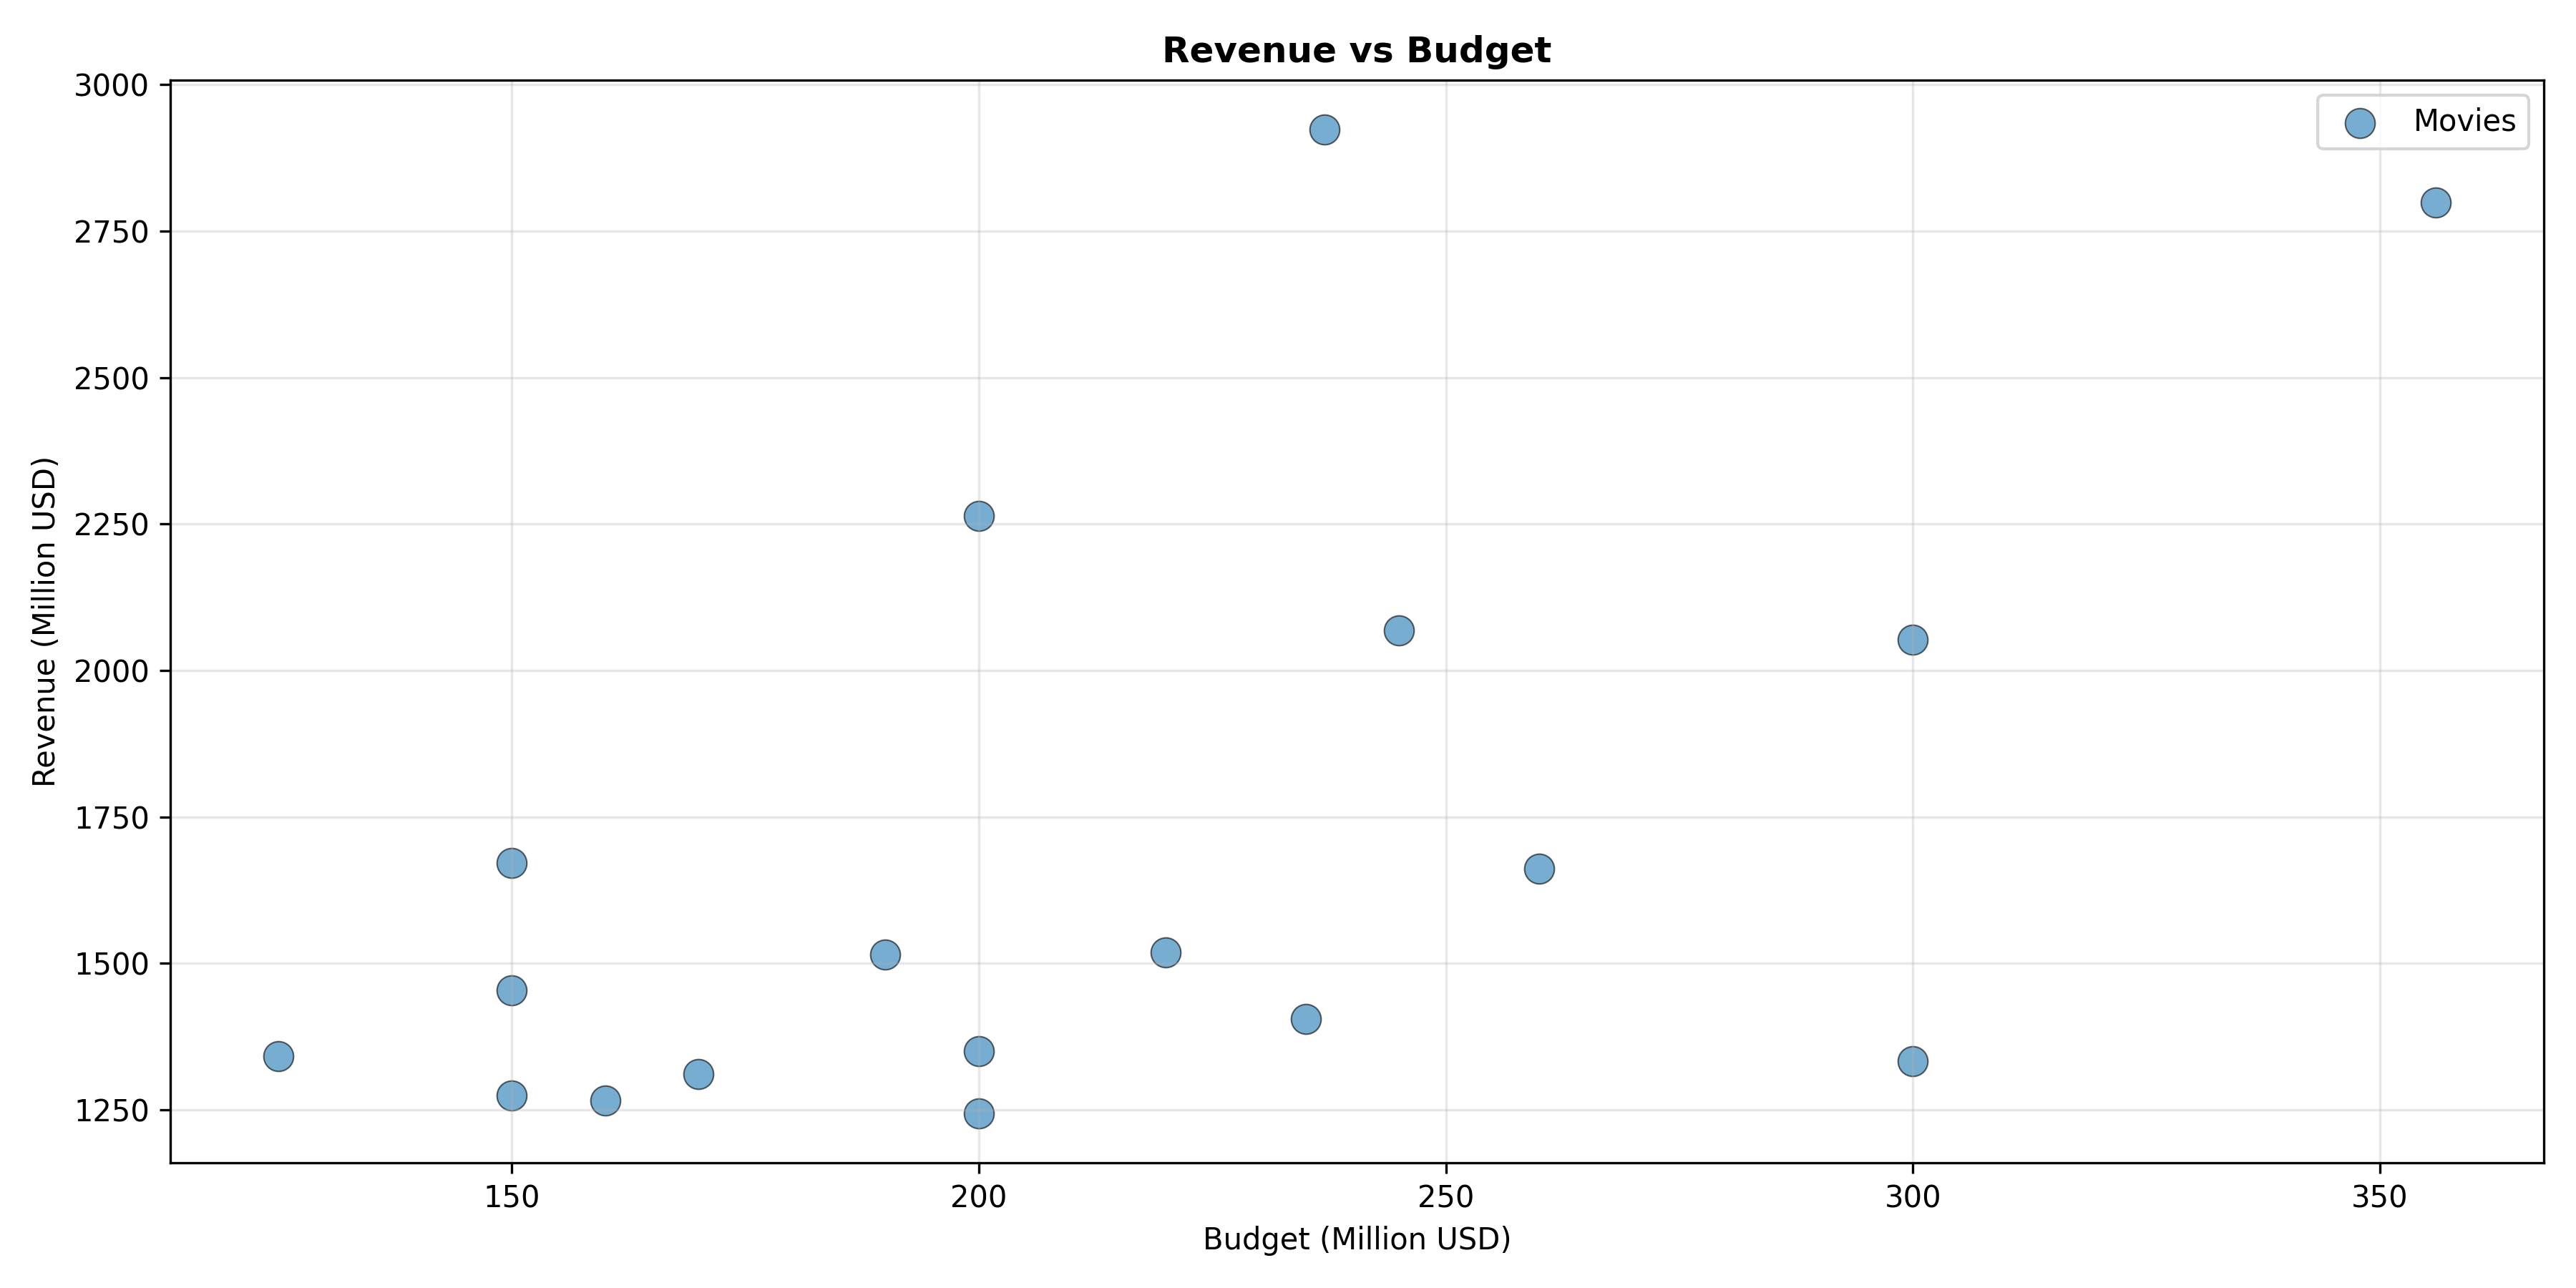

In [9]:
# Revenue vs Budget
show_viz("revenue_vs_budget.png")

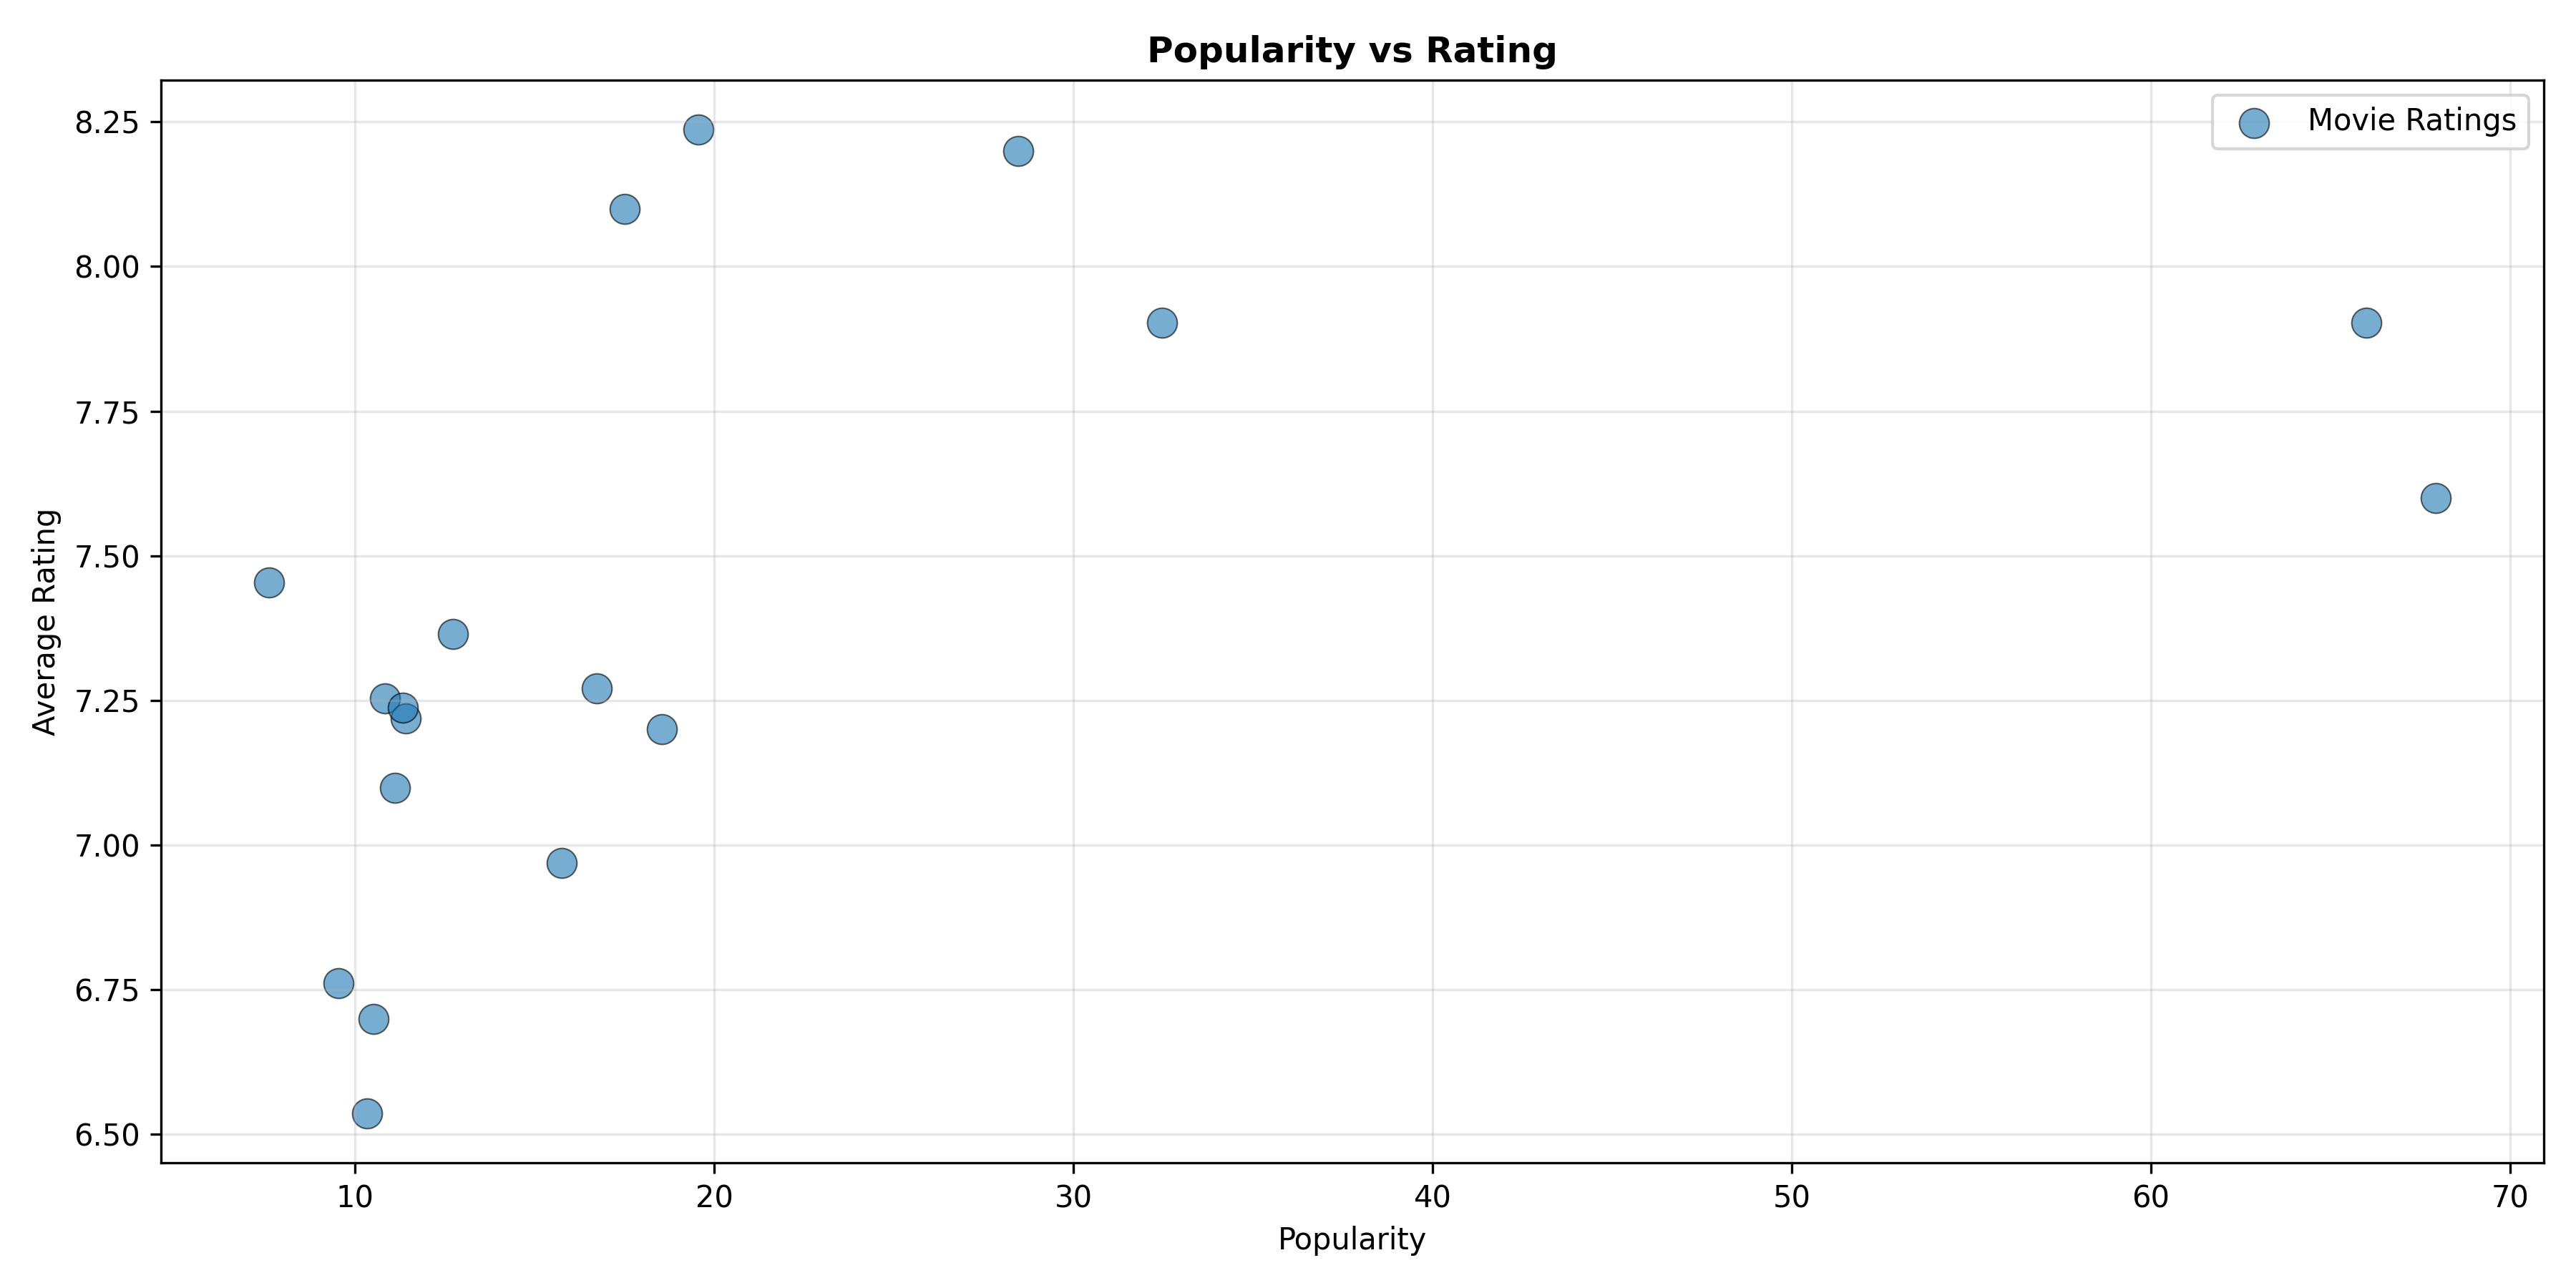

In [10]:
# Popularity vs Rating
show_viz("popularity_vs_rating.png")

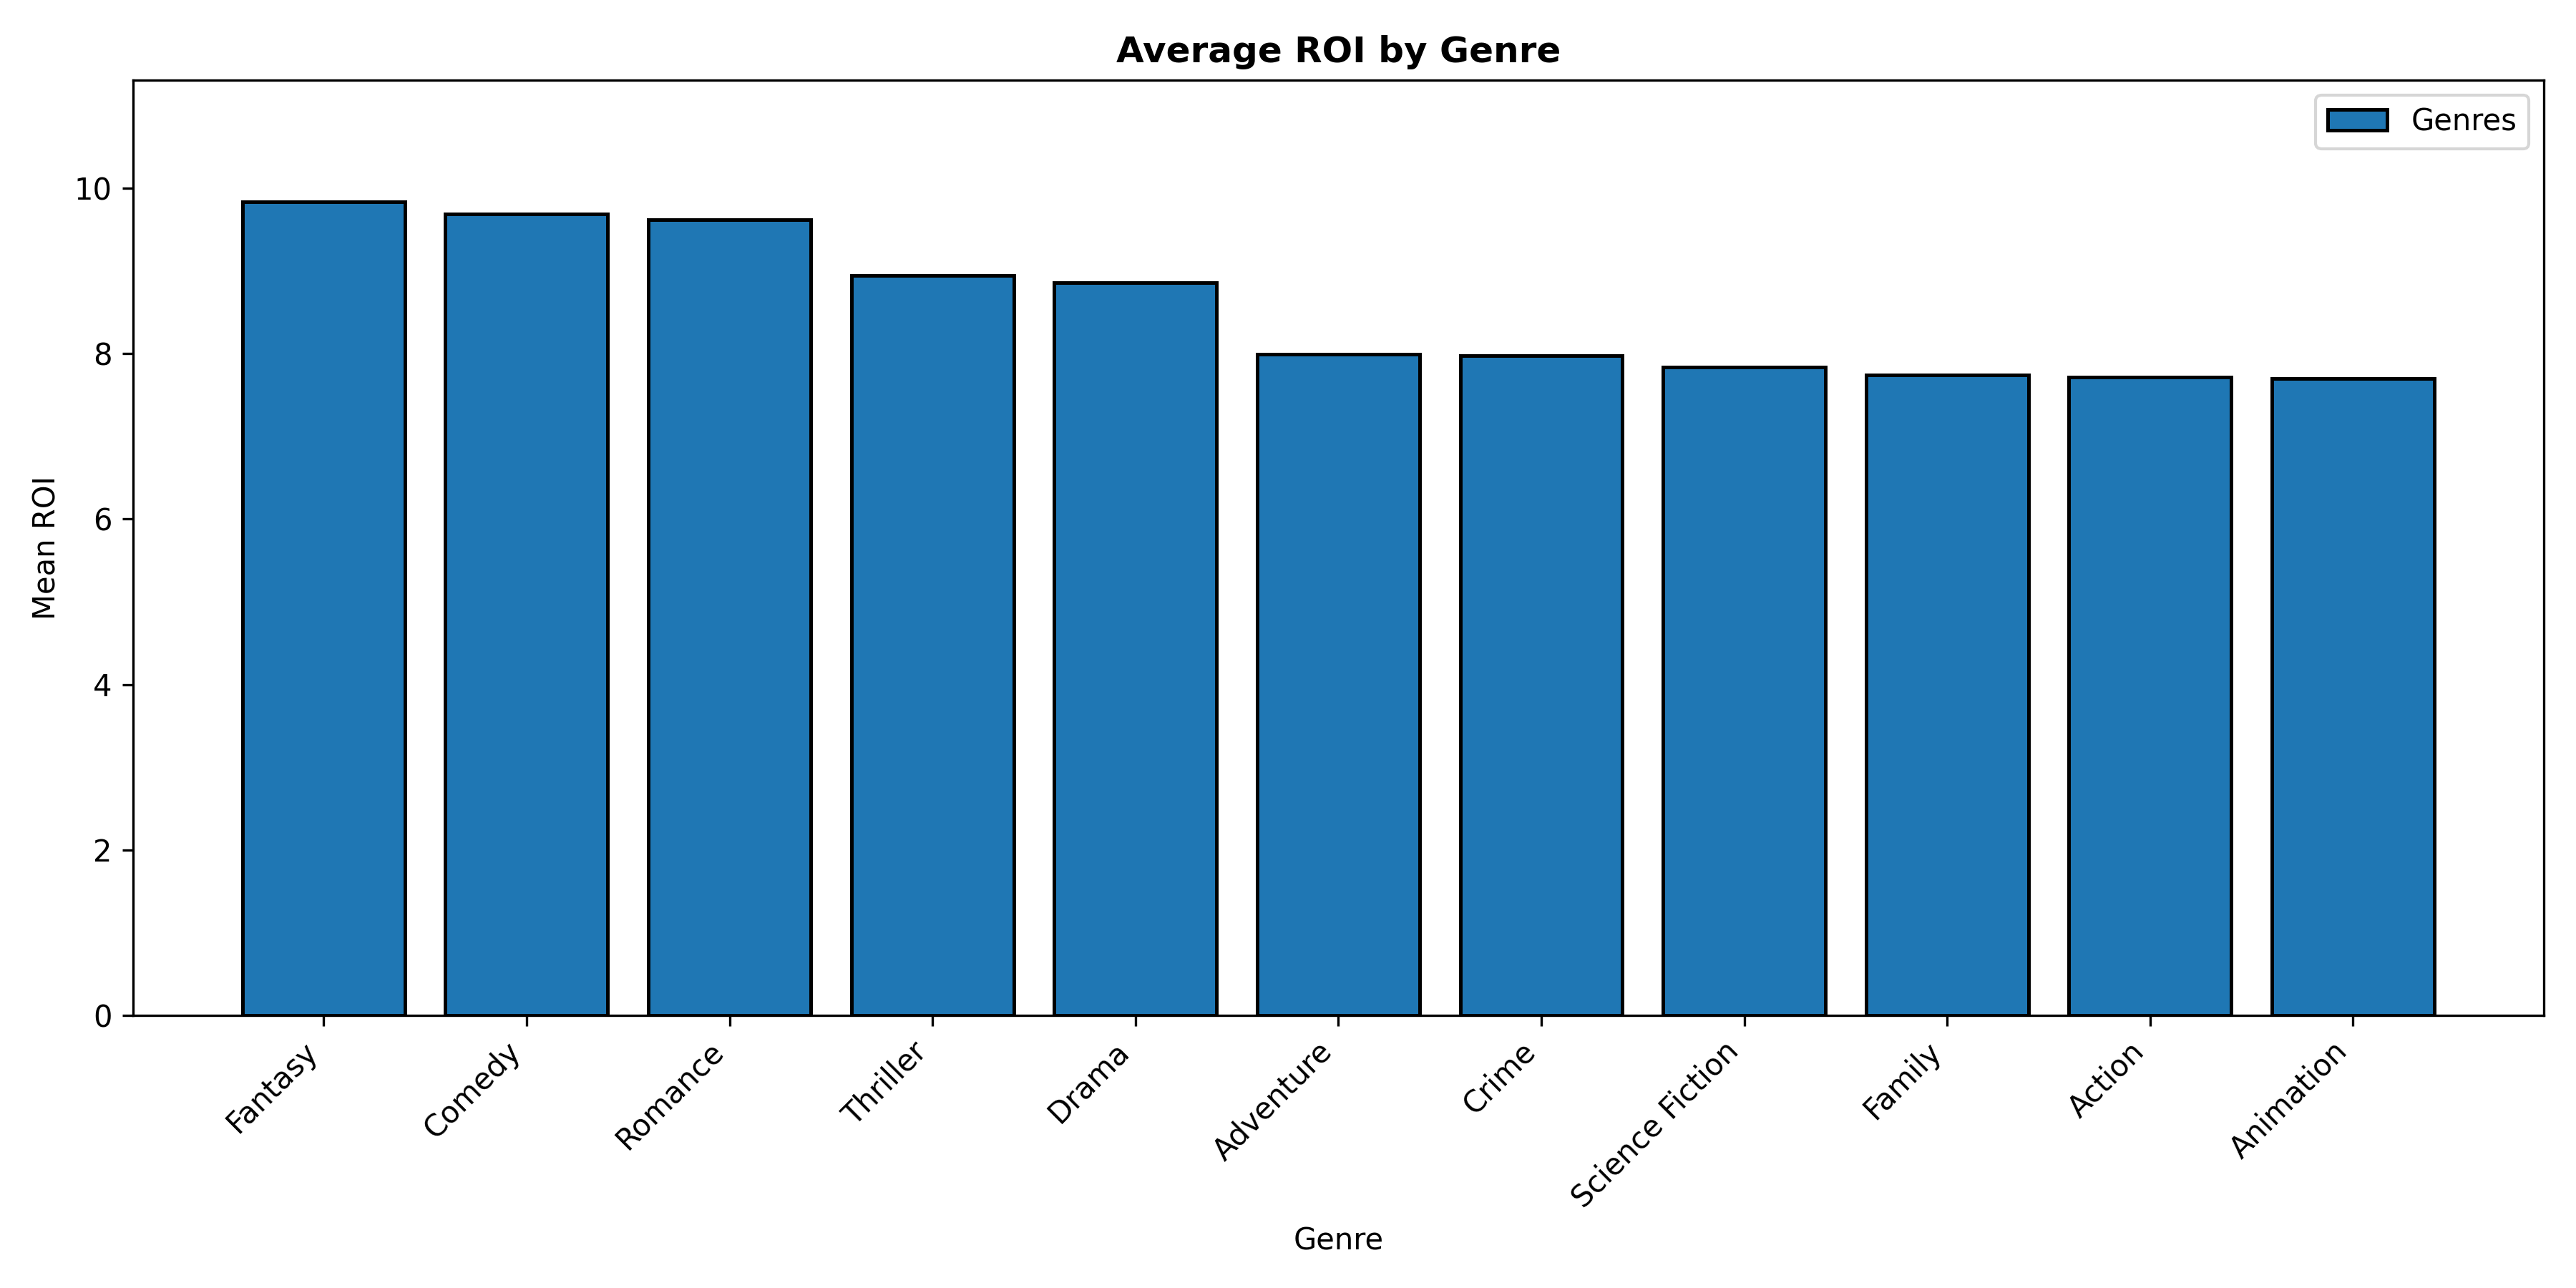

In [11]:
# ROI by Genre
show_viz("roi_by_genre_bar.png")

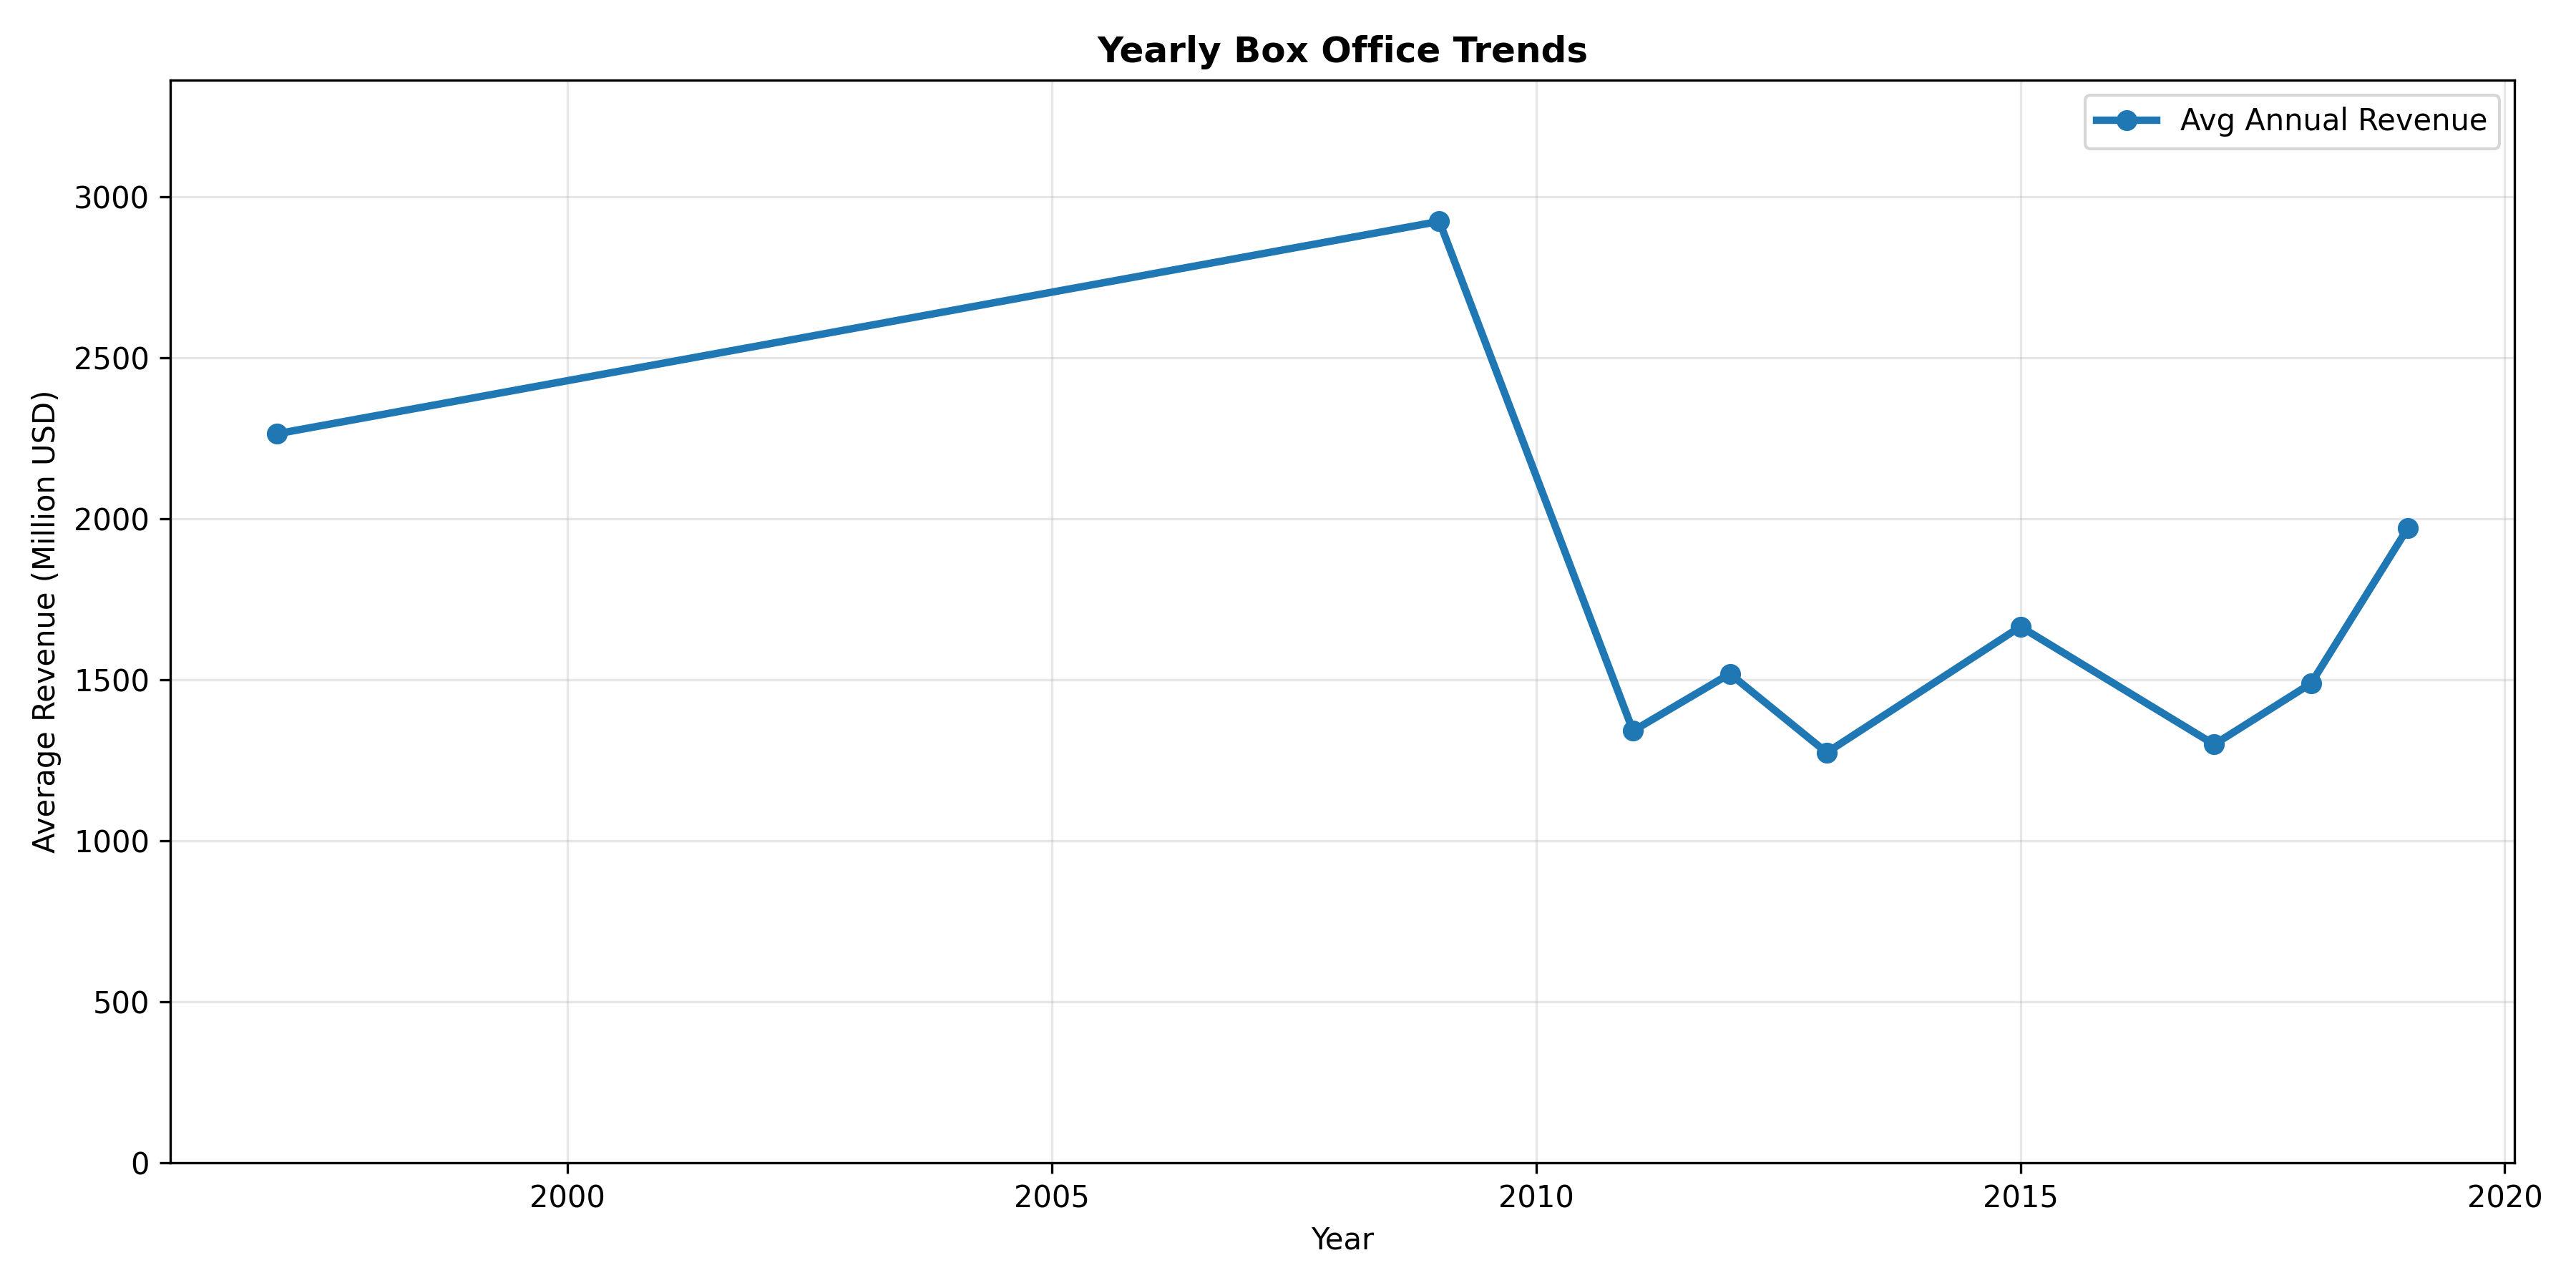

In [12]:
# Yearly Trends
show_viz("yearly_trends.png")

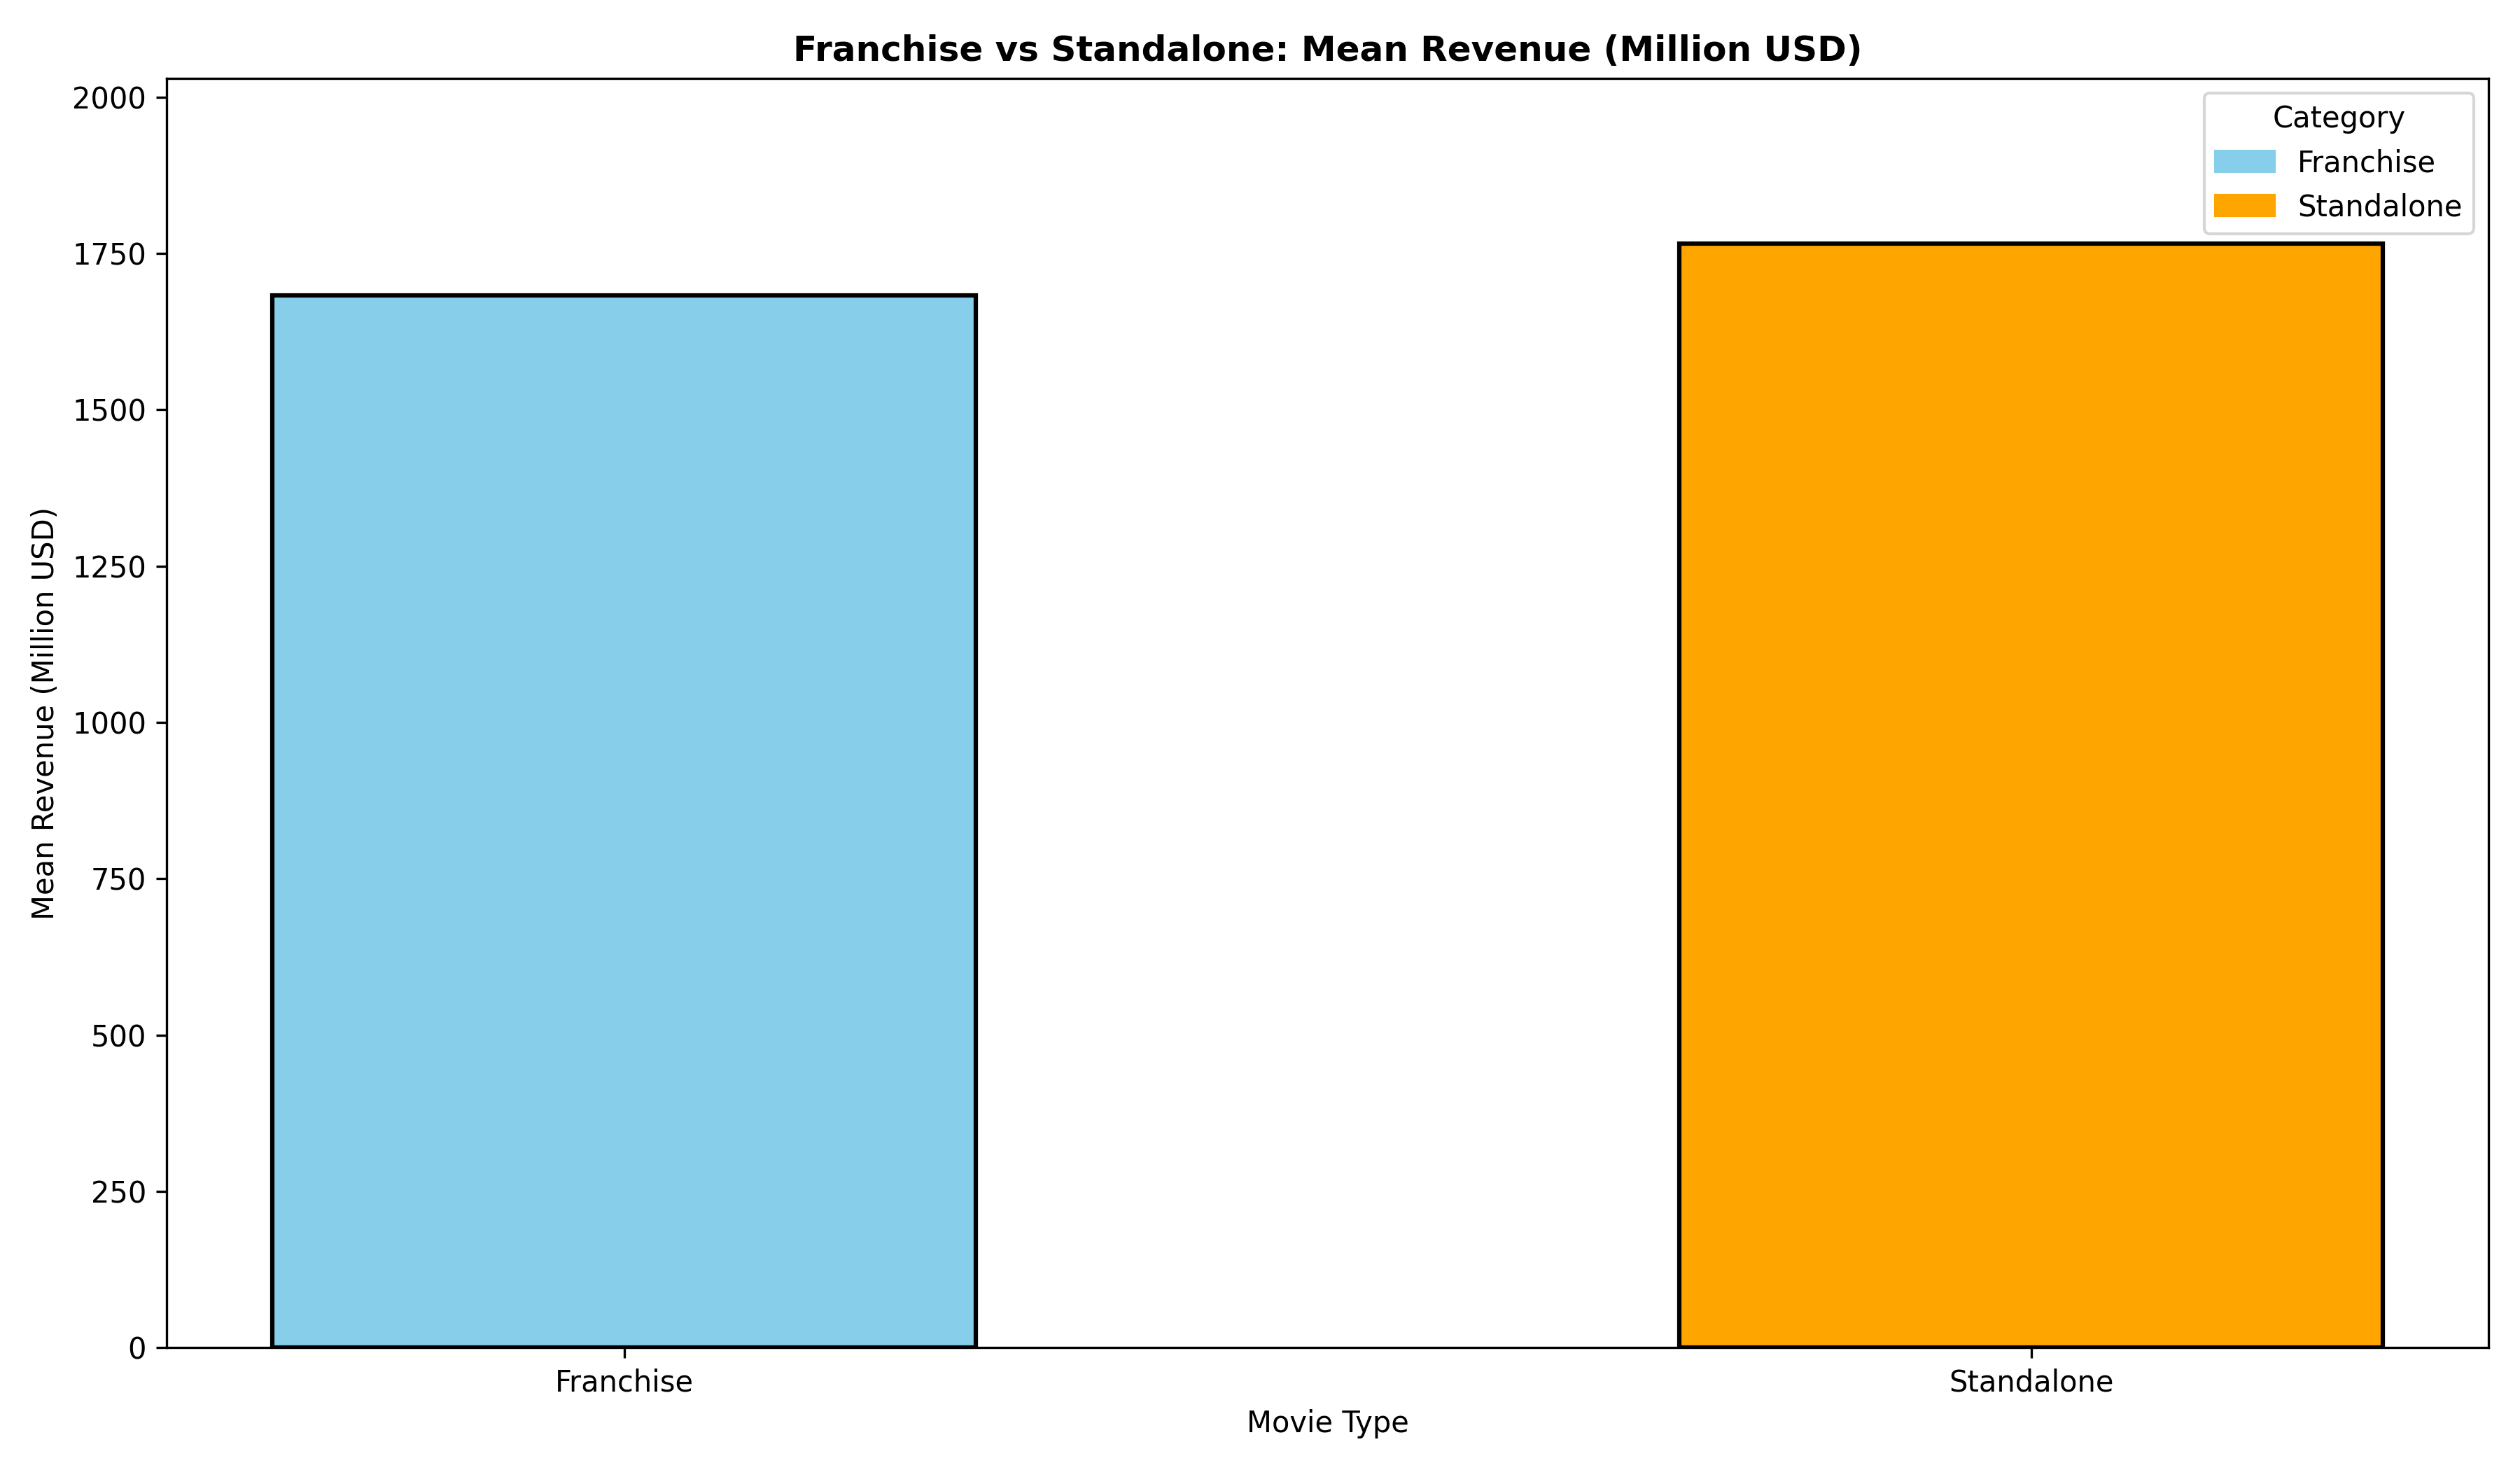

In [13]:
# Franchise vs Standalone - Revenue
show_viz("franchise_vs_standalone_mean_revenue.png")

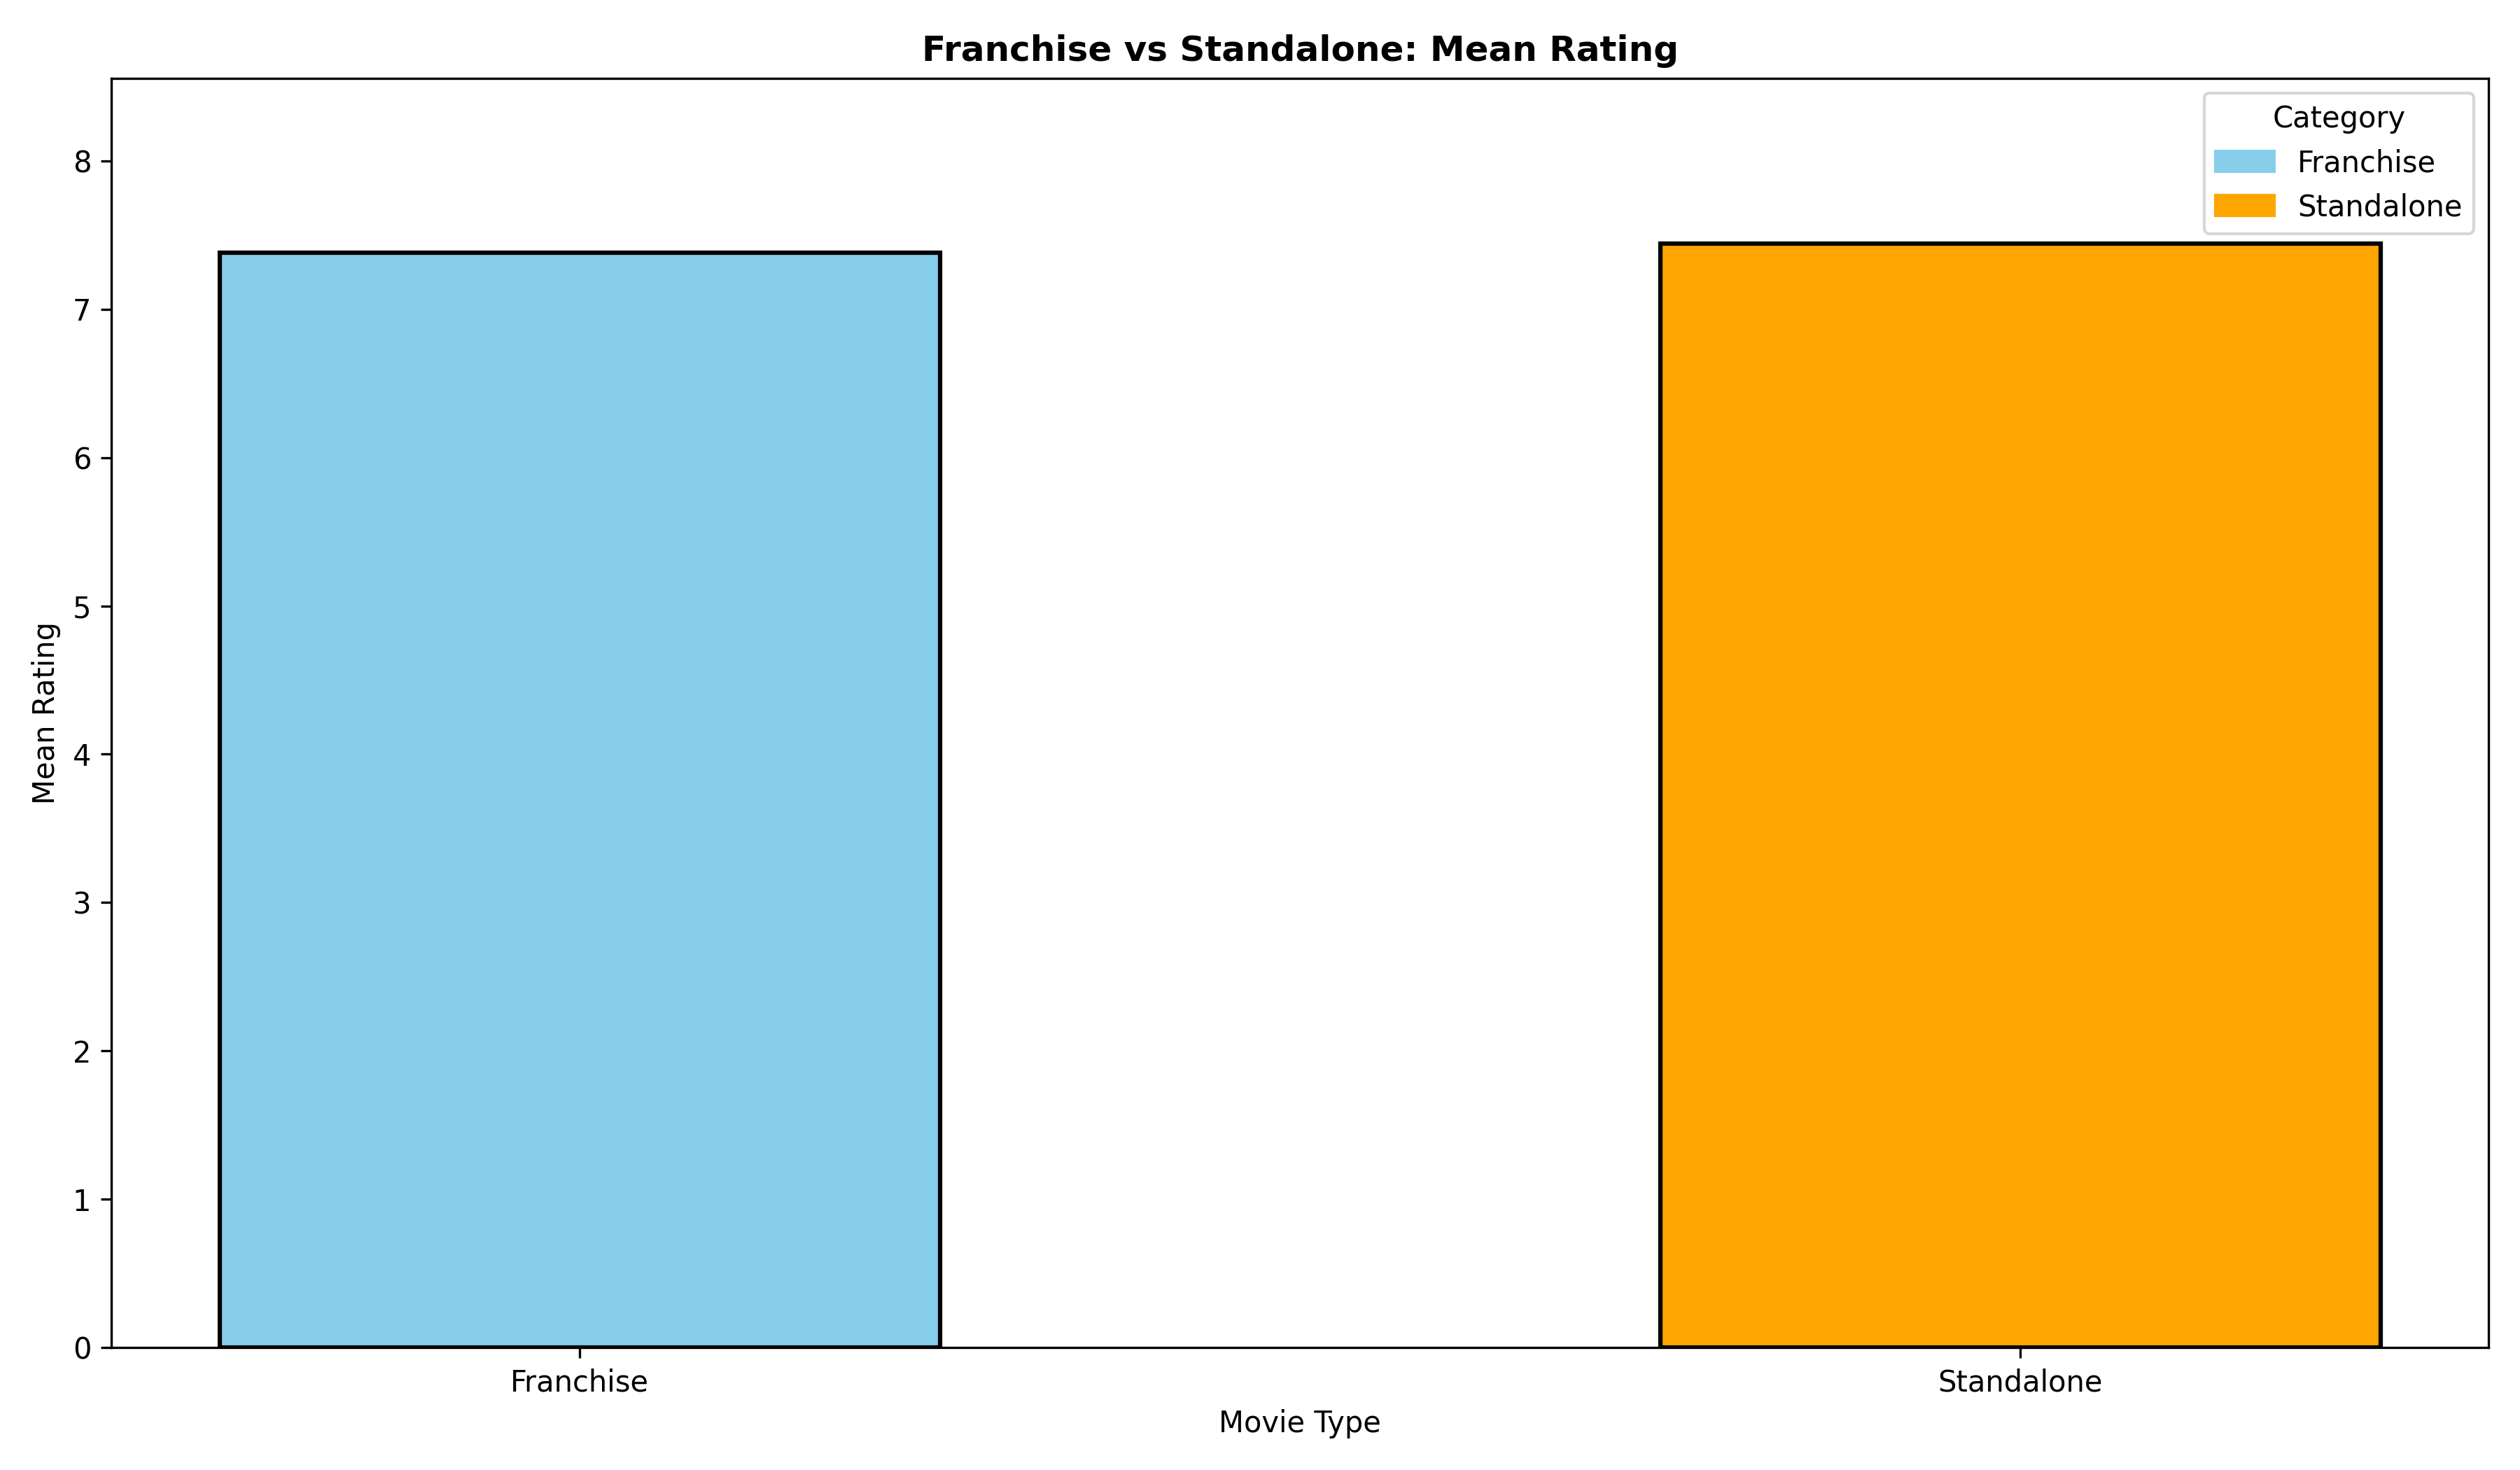

In [14]:
# Franchise vs Standalone - Rating
show_viz("franchise_vs_standalone_mean_rating.png")

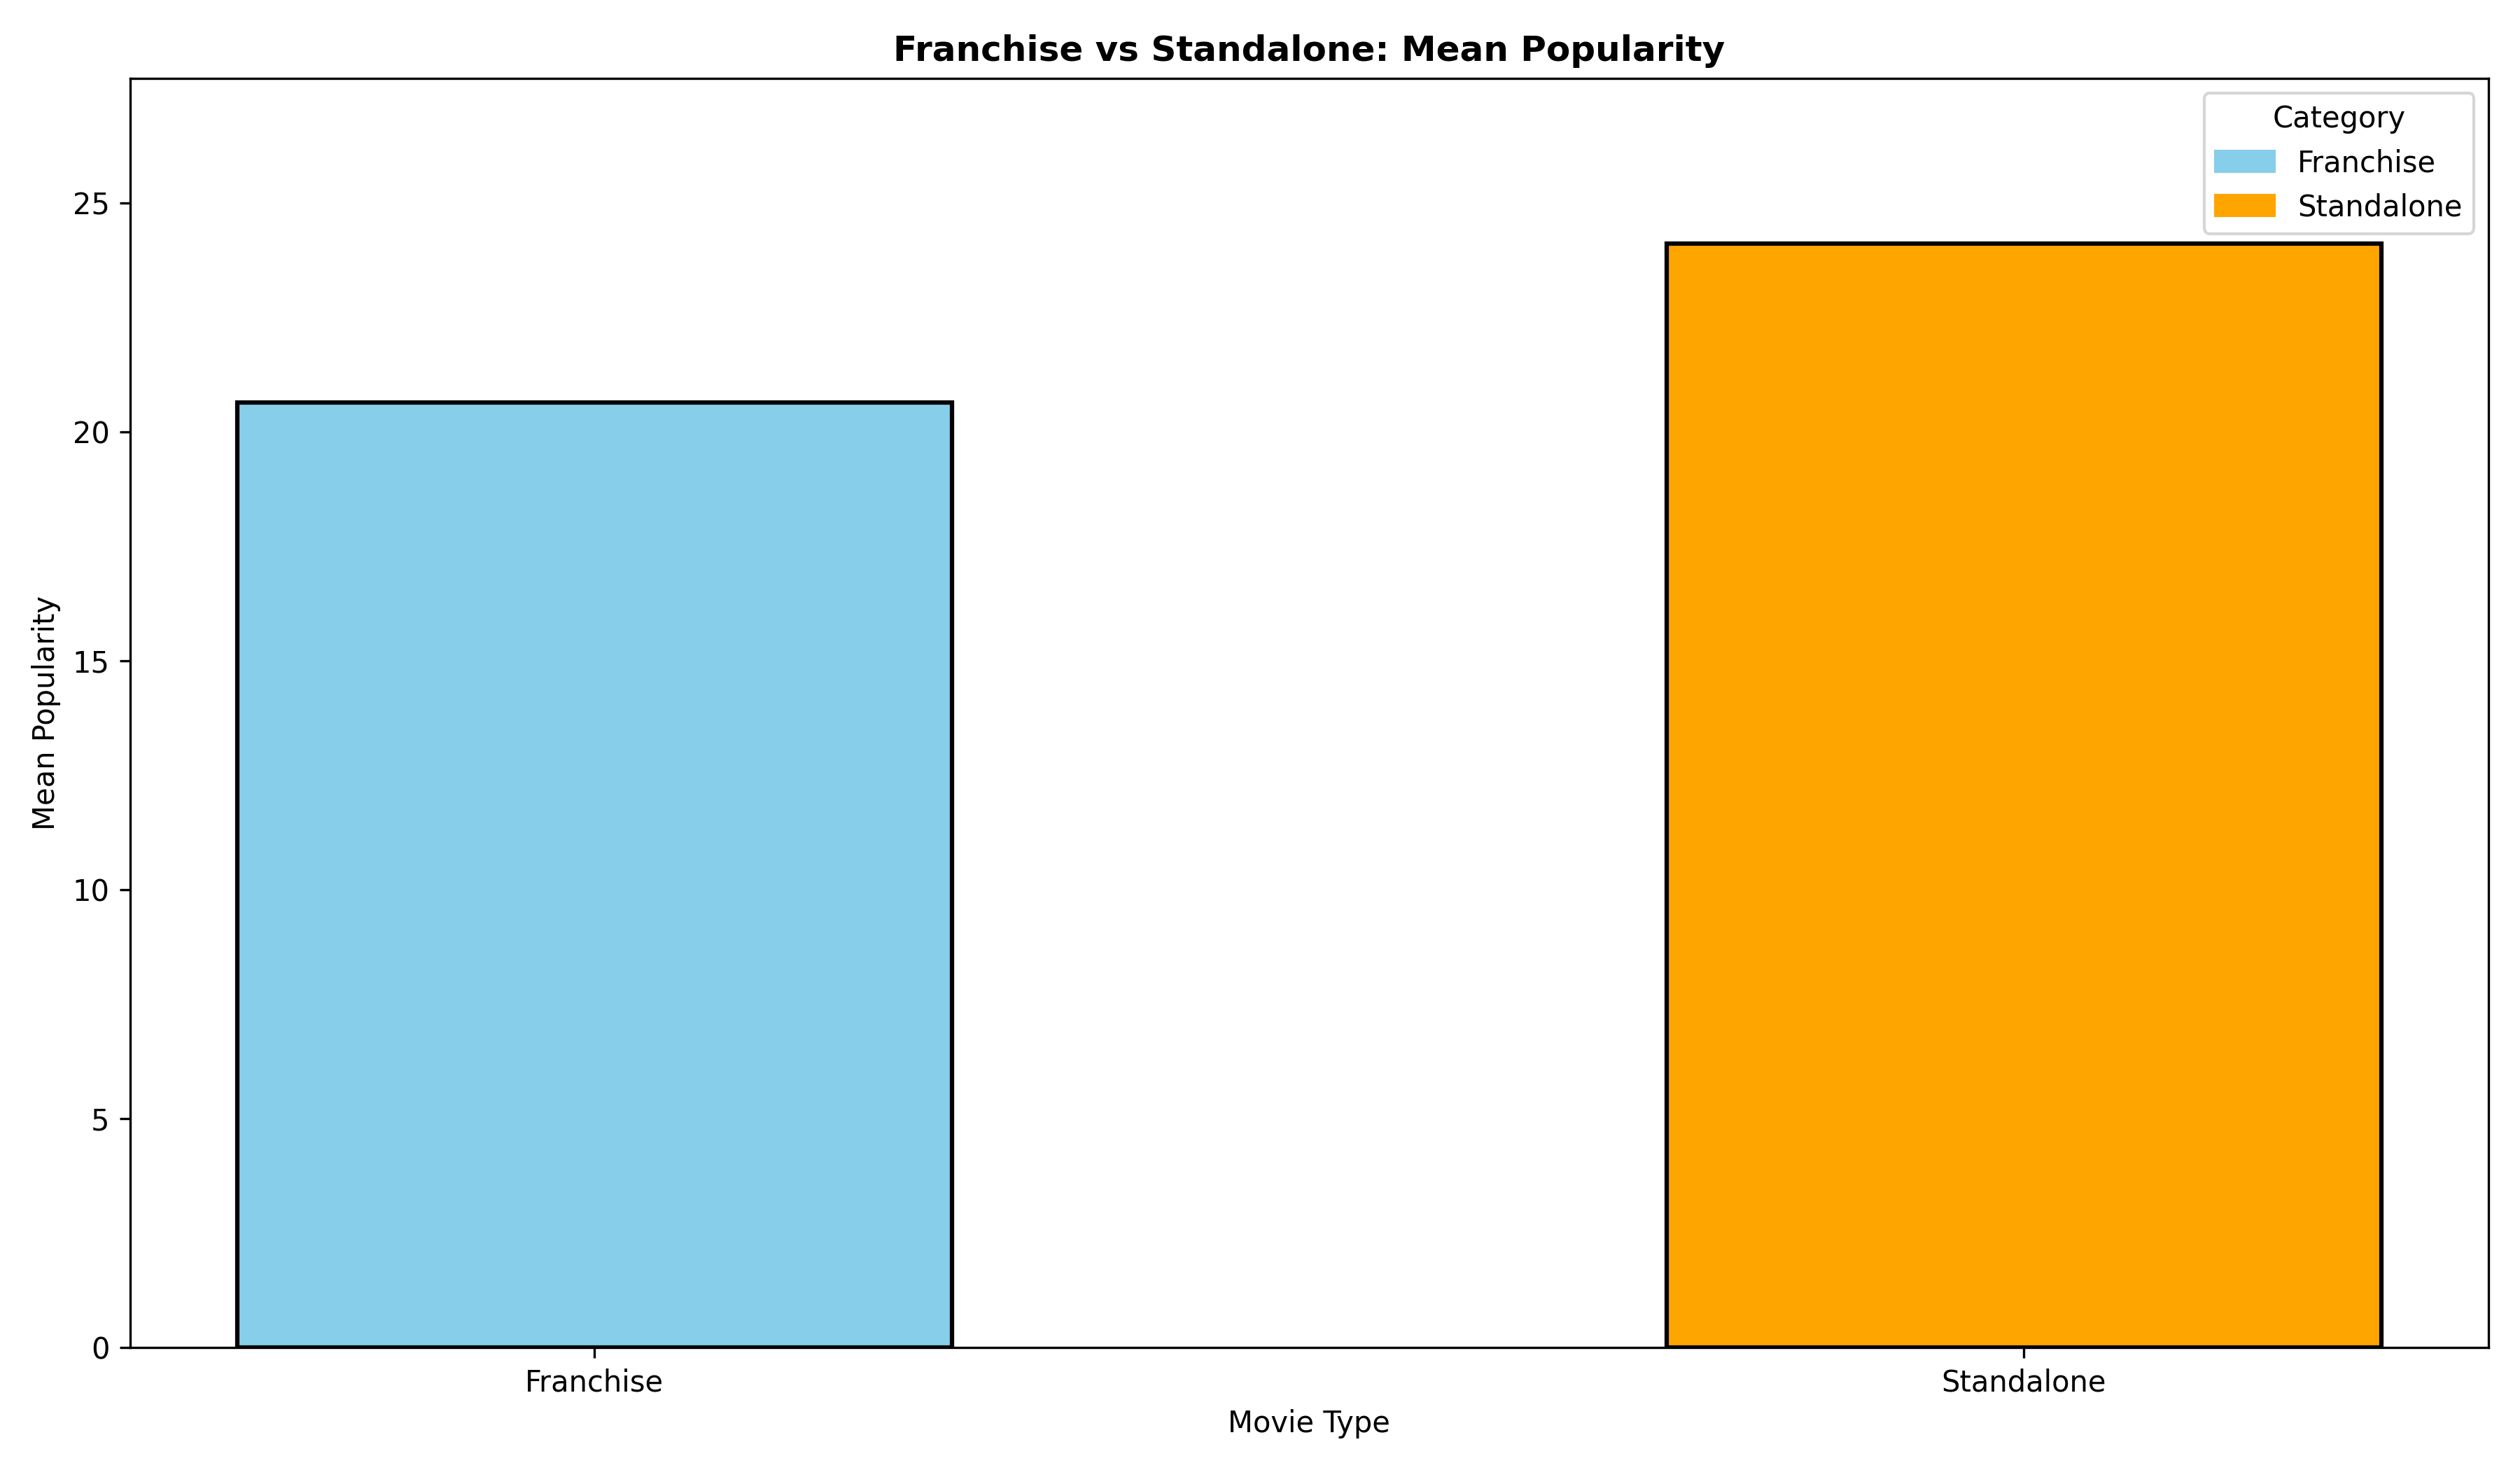

In [ ]:
# Franchise vs Standalone - Popularity
show_viz("franchise_vs_standalone_mean_popularity.png")